In [1]:
from csv_cleaner import clean_df
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVR
from pipeline import ML_pipeline
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

1. Import du dataset de base
2. création d'un nouveau Dataframe clean (utilisant `clean_df()`)
3. clean_df dans le Pipeline 

In [2]:
df = pd.read_csv("train.csv")

train = clean_df(df, 0)
train_30 = clean_df(df, 30)
train_50 = clean_df(df, 50)

X = train.drop('Price', axis=1)
y = train['Price']

## Instanciation d'un objet ML_pipeline

`model = ML_pipeline(model, X, y)`

In [3]:
svr = ML_pipeline(SVR(), X, y)


## Convertir les données numérique et catégorique
`model.data_conversion()`

In [4]:
svr.data_conversion()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats', 'New_Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Model', 'Location',
                                                   'Fuel_Type', 'Transmission',
                                                   'Owner_Type'])])),
                ('svr', SVR())])

## Afficher le pipeline complet

In [5]:
svr.full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats', 'New_Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Model', 'Location',
                                                   'Fuel_Type', 'Transmission',
                                                   'Owner_Type'])])),
                ('svr', SVR())])

## Paramétrage du GridSearch

On se sert ici de l'attribut `full_pipeline` de notre objet `svr` pour réaliser notre gridsearch

In [6]:
param_grid = {'svr__C' : [2, 3]}

svr_cv = GridSearchCV(svr.full_pipeline, param_grid = param_grid, cv=5, scoring="neg_mean_squared_error")

## Entraînement et évaluation du modèle

On utilise la méthode `model_train_eval(estimator_cv, nb_of_splits=5)`.
1. estimator_cv (obligatoire) : Le GridSearch non entraîné de notre modèle
2. nb_of_splits (Facultatif) : Nombre de split réalisé par le KFold. Par défaut = 5

In [7]:
svr.model_train_and_eval(svr_cv, nb_of_splits=2)

### On peut maintenant utiliser nos attributs pour accéder aux scores et meilleurs paramètres produit par le GridsearchCV

1. model.mean_mse_score : Score MSE du modèle
2. model.mean_rmse_score : Score RMSE du modèle
3. model.mean_r2_score : Score R2 du modèle
4. model.best_params : Listes des paramètres optimaux choisis par GridSearchCV

In [8]:
svr.best_params
svr.mean_rmse_score
svr.mean_mse_score
svr.mean_r2_score

0.8079886368313018

In [10]:
svr.print_model_stats()

Mean MSE Score : 24.252695545100785
Mean RMSE Score : 4.894723353483273
Mean R2 Score : 0.8079886368313018
Best GridSearch parameters : {'svr__C': 3}


# Création du graphique pour comparaison de la performance des modèles

`ML_pipeline.make_graph([model_1, model_2, model_3])` : Pour créer le graphique comparant   les scores de chaque modèle. Les objets attendus en paramètre sont les instance des modèles créer avec la classe `ML_pipeline`.

In [ ]:
ML_pipeline.make_graph([svr_1, svr_2, svr_3])

SVR()<br>
Mean MSE Score : 6.31687593368761 <br>
Mean RMSE Score : 2.5119890502005964 <br>
Mean R2 Score : 0.8782113947815061 <br>
Best GridSearch parameters : {'svr__C': 1, 'svr__epsilon': 0.1} <br>

SVR()<br>
Mean MSE Score : 6.31687593368761<br>
Mean RMSE Score : 2.5119890502005964<br>
Mean R2 Score : 0.8782113947815061<br>
Best GridSearch parameters : {'svr__C': 1, 'svr__epsilon': 0.1}<br>

SVR()<br>
Mean MSE Score : 6.31687593368761<br>
Mean RMSE Score : 2.5119890502005964<br>
Mean R2 Score : 0.8782113947815061<br>
Best GridSearch parameters : {'svr__C': 1, 'svr__epsilon': 0.1}<br>

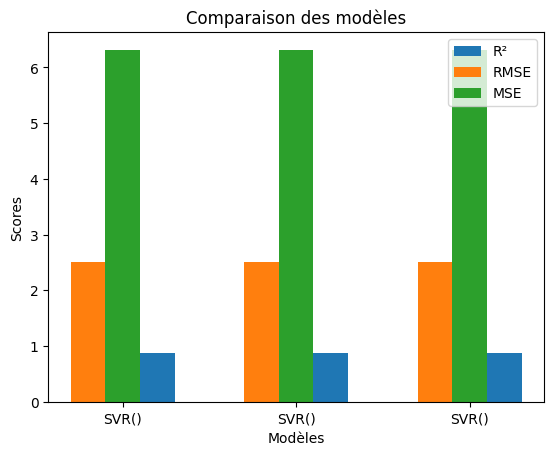